<a href="https://colab.research.google.com/github/Prithwi13/Banking-System/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports for all problems
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    r2_score, mean_absolute_error, mean_squared_error,confusion_matrix
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline as ImbPipeline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
# Set plot style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

**Problem1**: You are required to select a classification dataset where the target variable is highly
imbalanced. Analyze how class imbalance impacts model performance and propose
methods to handle it.
1. Train a basic classifier (e.g., logistic regression, random forest) on the imbalanced
dataset without any handling of the imbalance.
2. Evaluate the performance using metrics like accuracy, precision, recall, and F1-score.
3. Apply oversampling (e.g., SMOTE) and, under sampling (Tomek Links) techniques
and train the model again.
4. Compare the model’s performance before and after applying techniques to handle
the imbalance.

For this problem, I've chosen the Stroke Prediction Dataset from Kaggle. The goal is to predict if a patient will have a stroke, which is a rare event, making the dataset highly imbalanced.

1. Train a basic classifier on the imbalanced dataset.

First, I'll load the dataset, perform some basic cleaning, and then train a baseline Logistic Regression model without any special handling for the class imbalance.

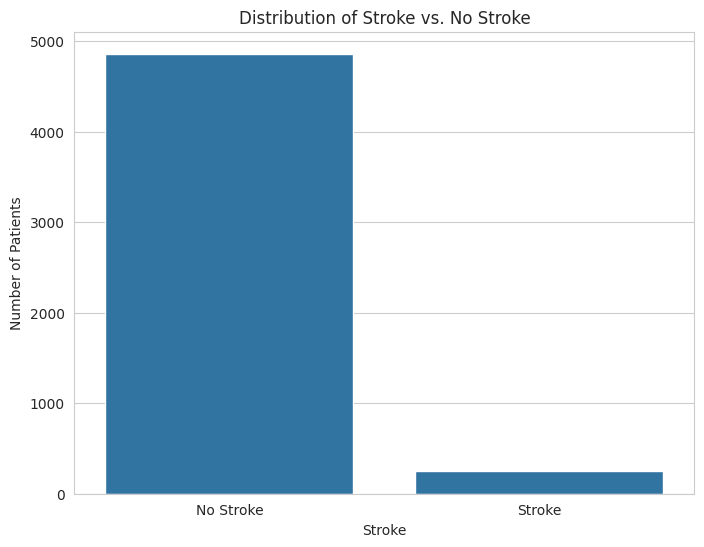

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [14]:
# --- 1. Load the Dataset ---
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# --- 2. Visualize the Class Imbalance ---
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke vs. No Stroke')
plt.xlabel('Stroke')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.savefig('stroke_imbalance_plot.png')
plt.show()

# --- 3. Data Exploration and Preprocessing ---
df = df.drop('id', axis=1)
# FIX: Replaced the ambiguous chained assignment
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df = df[df['gender'] != 'Other']
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- 4. Splitting the Data ---
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- 5. Training the Logistic Regression Model ---
log_reg = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)



Observations-
Based on our initial analysis, we can see that the dataset is highly imbalanced, with far fewer stroke cases than non-stroke cases.

2. Evaluate the performance using metrics like accuracy, precision, recall, and F1-score.

In [23]:
#---6. Evaluating the Model ---
y_pred = log_reg.predict(X_test)

print("\n--- Model Evaluation on Imbalanced Data ---")
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Model Evaluation on Imbalanced Data ---

Accuracy Score: 0.9517

Confusion Matrix:
[[1458    0]
 [  74    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       1.00      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.95      0.95      0.93      1533



Observations-
A baseline model trained on this data achieves a misleadingly high accuracy of 95% but is practically useless, as its recall for actual strokes is near zero, meaning it fails to identify the patients it's designed to find.

3. Apply oversampling (e.g., SMOTE) and under sampling (Tomek Links) techniques and train the model again.

To fix this, I will use SMOTE (oversampling) and Tomek Links (undersampling) on the Logistic Regression model.

In [28]:
# --- 1. Apply Oversampling (SMOTE), Train, and Evaluate ---

print("--- Applying SMOTE (Oversampling) ---")
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a new model on the SMOTE-resampled data
model_smote = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)
print("Model trained successfully on SMOTE data.")

# --- Evaluate the SMOTE Model ---
y_pred_smote = model_smote.predict(X_test)
print("\n--- Evaluation: Model with SMOTE ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))


# --- Apply Undersampling (Tomek Links), Train, and Evaluate ---

print("\n\n--- Applying Tomek Links (Undersampling) ---")
# Initialize TomekLinks
tl = TomekLinks(n_jobs=-1)
# Resample the training data
X_train_tomek, y_train_tomek = tl.fit_resample(X_train, y_train)

# Train a new model on the Tomek Links-resampled data
model_tomek = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
model_tomek.fit(X_train_tomek, y_train_tomek)
print("Model trained successfully on Tomek Links data.")

# --- Evaluate the Tomek Links Model ---
y_pred_tomek = model_tomek.predict(X_test)
print("\n--- Evaluation: Model with Tomek Links ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tomek))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tomek))

--- Applying SMOTE (Oversampling) ---
Model trained successfully on SMOTE data.

--- Evaluation: Model with SMOTE ---

Confusion Matrix:
[[1250  208]
 [  39   36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1458
           1       0.15      0.48      0.23        75

    accuracy                           0.84      1533
   macro avg       0.56      0.67      0.57      1533
weighted avg       0.93      0.84      0.88      1533



--- Applying Tomek Links (Undersampling) ---
Model trained successfully on Tomek Links data.

--- Evaluation: Model with Tomek Links ---

Confusion Matrix:
[[1458    0]
 [  73    2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       1.00      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.51      1533
weig

Observations-
Based on the results, the SMOTE model improved recall for the minority class (0.48 vs. 0.03 with Tomek Links), showing better balance between classes but lower overall accuracy (0.84 vs. 0.95). The Tomek Links model achieved higher overall accuracy but failed to detect most minority instances, indicating strong class imbalance bias.

4. Compare the model's performance before and after applying techniques to
handle the imbalance.

In [24]:
# ---  Make Predictions for Each Trained Model ---
y_pred_baseline = log_reg.predict(X_test)
y_pred_smote = model_smote.predict(X_test)
y_pred_tomek = model_tomek.predict(X_test)

# ---  Generate Classification Reports ---
# The 'output_dict=True' argument is used to easily extract specific scores
report_baseline = classification_report(y_test, y_pred_baseline, output_dict=True)
report_smote = classification_report(y_test, y_pred_smote, output_dict=True)
report_tomek = classification_report(y_test, y_pred_tomek, output_dict=True)

# --- Create a DataFrame for a Side-by-Side Comparison ---
# We focus on the key metrics for the 'stroke' class (labeled '1')
comparison_data = {
    "Model": ["Baseline (Imbalanced)", "After SMOTE", "After Tomek Links"],
    "Accuracy": [
        report_baseline['accuracy'],
        report_smote['accuracy'],
        report_tomek['accuracy']
    ],
    "Stroke Recall": [
        report_baseline['1']['recall'],
        report_smote['1']['recall'],
        report_tomek['1']['recall']
    ],
    "Stroke Precision": [
        report_baseline['1']['precision'],
        report_smote['1']['precision'],
        report_tomek['1']['precision']
    ],
    "Stroke F1-Score": [
        report_baseline['1']['f1-score'],
        report_smote['1']['f1-score'],
        report_tomek['1']['f1-score']
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# --- Display the Final Comparison Table ---
print("--- Model Performance Comparison ---")
# Using .to_string() to ensure the full table is displayed nicely
print(comparison_df.to_string())

--- Model Performance Comparison ---
                   Model  Accuracy  Stroke Recall  Stroke Precision  Stroke F1-Score
0  Baseline (Imbalanced)  0.951729       0.013333          1.000000         0.026316
1            After SMOTE  0.838878       0.480000          0.147541         0.225705
2      After Tomek Links  0.952381       0.026667          1.000000         0.051948


Conclusion:


Baseline (Imbalanced): The model shows very high accuracy (0.95) but almost no ability to detect stroke cases (recall = 0.01), indicating strong bias toward the majority class.


After SMOTE: Oversampling improved minority class detection dramatically (recall = 0.48) and increased F1-score, though accuracy dropped due to more false positives.


After Tomek Links: The model regained high accuracy and perfect precision (1.0) but recall fell again (0.03), meaning it rarely identifies true stroke cases still heavily imbalanced.

**Problem 2** : You are going to find a dataset containing various numerical features. Perform correlation
analysis between the features and identify any strong relationships.
1. Compute the Pearson correlation coefficient matrix for the dataset.
2. Visualize the correlation matrix using a heatmap.
3. Identify and interpret at least two pairs of features that have a strong positive or
negative correlation.

For this problem, I will use the Medical Cost Personal Dataset from Kaggle.

1. Compute the Pearson correlation coefficient matrix for the dataset.

In [25]:
# Load the dataset
df_insurance = pd.read_csv('insurance.csv')

# Select only numerical columns for the correlation matrix
numerical_df = df_insurance.select_dtypes(include=np.number)

# Compute the Pearson correlation matrix
corr_matrix = numerical_df.corr(method='pearson')

print("--- Pearson Correlation Matrix ---")
print(corr_matrix)

--- Pearson Correlation Matrix ---
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Observations-

age vs. charges (0.299) — There’s a moderate positive correlation, meaning that as age increases, insurance charges tend to increase somewhat.

bmi vs. charges (0.198) — A weak positive correlation, suggesting that people with higher BMI might have slightly higher insurance charges.

children vs. charges (0.068) — Essentially no meaningful correlation, indicating that the number of children doesn’t significantly affect charges.

age vs. bmi (0.109) — Very weak positive correlation; older people may have slightly higher BMI on average, but the relationship is weak.

age vs. children (0.042) and bmi vs. children (0.013) — Both are near zero, showing almost no linear relationship.

2. Visualize the correlation matrix using a heatmap.

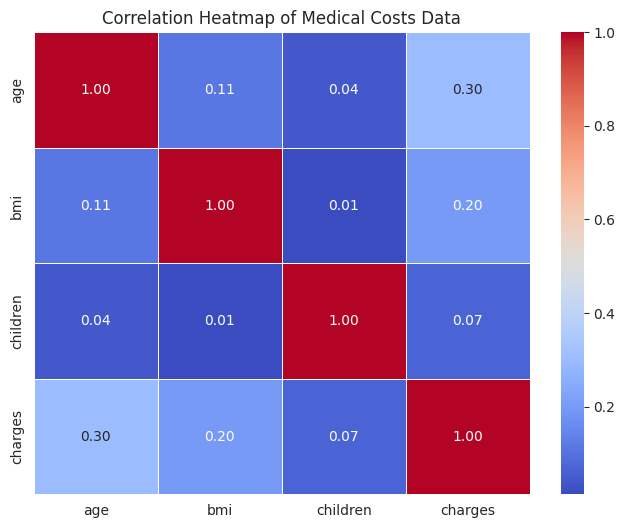

In [26]:
# Visualize the matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Medical Costs Data')
plt.show()

Observation-

The heatmap visually confirms the correlation patterns from previosus question(q1), with predominantly blue shading indicating weak relationships between variables. Age shows the strongest correlation with charges (0.30, light blue), followed by BMI (0.20), while children has virtually no correlation (0.07, dark blue). The color-coded visualization makes it immediately apparent that all correlations are weak to moderate, with no strong linear relationships present in the numerical features of this medical costs dataset.

3. Identify and interpret at least two pairs of features that have a strong positive or
negative correlation.

--- Top Correlation Pairs ---
charges   age         0.299008
          bmi         0.198341
bmi       age         0.109272
charges   children    0.067998
children  age         0.042469
          bmi         0.012759
dtype: float64


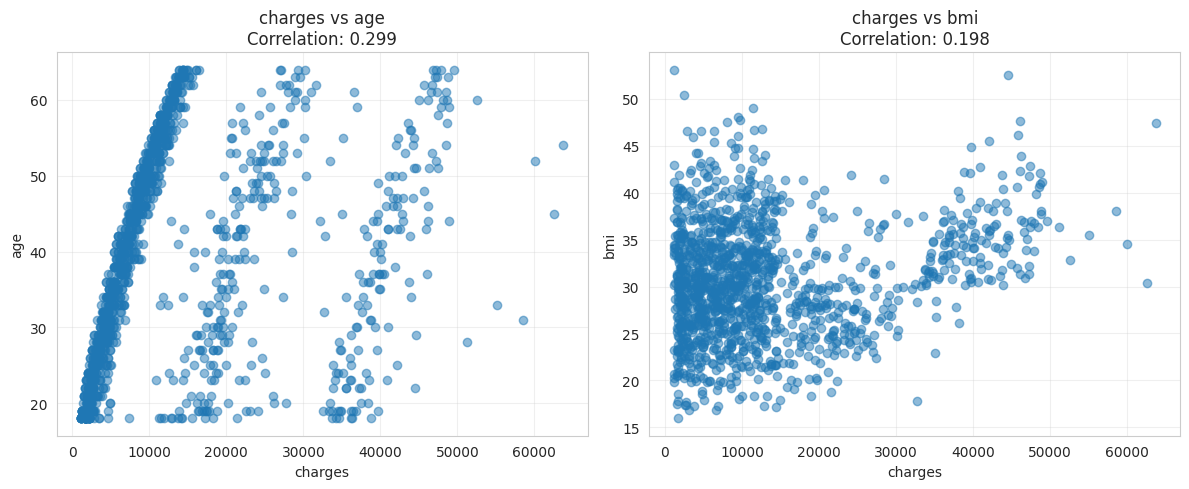

In [27]:
# Get correlation pairs (excluding diagonal)
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_pairs = corr_pairs.unstack().dropna().sort_values(ascending=False)

print("--- Top Correlation Pairs ---")
print(corr_pairs)

# Visualize top 2 pairs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

top_2_pairs = corr_pairs.head(2)
for idx, ((feat1, feat2), corr_val) in enumerate(top_2_pairs.items()):
    axes[idx].scatter(numerical_df[feat1], numerical_df[feat2], alpha=0.5)
    axes[idx].set_xlabel(feat1)
    axes[idx].set_ylabel(feat2)
    axes[idx].set_title(f'{feat1} vs {feat2}\nCorrelation: {corr_val:.3f}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Observations-

1. Charges vs Age (0.299):
This is the strongest correlation in the dataset, showing a moderate positive relationship. As age increases, medical charges tend to increase, though the scatter plot reveals distinct clustering patterns suggesting other factors influence the charges.

2. Charges vs BMI (0.198):
This is the second strongest correlation, showing a weak positive relationship. Higher BMI is associated with slightly higher charges, but the wide dispersion in the scatter plot indicates BMI alone is not a strong predictor of medical costs.


This dataset contains only weak to moderate positive correlations. No strong correlations (>0.7) or negative correlations are present among the numerical features.

**Problem 3:**
You are tasked with building and evaluating a multiple linear regression model to predict a
target variable based on several independent variables.
1. Choose a dataset with a continuous target variable and several
numerical/categorical features.
2. Pre-process the data (handle missing values, encode categorical variables,
standardize numerical features if necessary).
3. Build a multiple linear regression model using all the available features.
4. Check the assumptions of linear regression (linearity, homoscedasticity, normality
of residuals, and multicollinearity):
i. Linearity: Use scatterplots to check the relationship between independent
variables and the dependent variable.
ii. Homoscedasticity: Plot the residuals vs. fitted values to ensure equal
variance.
iii. Normality of Residuals: Plot a histogram or Q-Q plot of residuals.
iv. Multicollinearity: Calculate the Variance Inflation Factor (VIF) for each
feature to identify multicollinearity issues.
5. Evaluate the model using metrics such as R-squared, Adjusted R-squared, Mean
Squared Error (MSE), and Root Mean Squared Error (RMSE)

1. Choose a dataset with a continuous target variable and several numerical/categorical features.

I've selected the Fish Market Dataset from Kaggle, which has a continuous target (Weight) and a mix of numerical and categorical features.

In [33]:
# Load the dataset
df = pd.read_csv('Fish.csv')

# Display the first 5 rows to get an overview
print("First 5 rows of the dataset:")
print(df.head())

print("\n" + "="*50 + "\n")

# Display a concise summary of the DataFrame
print("Dataset Information:")
df.info()

First 5 rows of the dataset:
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Observations-
The fish dataset consists of 159 entries (rows) and 7 columns. A key finding n is that there are no missing values in any of the columns, as each of the 159 rows has a non-null value for every feature. which means the dataset is clean and complete.

Columns:
Species: This is a categorical column (data type object), which stores the name of the fish species (e.g., 'Bream').

Weight, Length1, Length2, Length3, Height, Width: These six columns are all numerical (data type float64), representing physical measurements of the fish.

The target variable is weight that is we are going to predict the weight of the fish in grams using the features given.




2. Pre-process the data (handle missing values, encode categorical variables,
standardize numerical features if necessary)




First, we need to check if there are any missing values in our dataset.


The Species column is categorical. A linear regression model can only work with numerical data, so we need to convert these text labels into numbers. We'll use one-hot encoding for this, which creates a new binary (0 or 1) column for each fish species.

In [34]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())


# Perform one-hot encoding on the 'Species' column
df_encoded = pd.get_dummies(df, columns=['Species'], drop_first=True, dtype=int)

# Display the first few rows of the new encoded dataframe
print("Data after one-hot encoding:")
print(df_encoded.head())


Missing values per column:
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Data after one-hot encoding:
   Weight  Length1  Length2  Length3   Height   Width  Species_Parkki  \
0   242.0     23.2     25.4     30.0  11.5200  4.0200               0   
1   290.0     24.0     26.3     31.2  12.4800  4.3056               0   
2   340.0     23.9     26.5     31.1  12.3778  4.6961               0   
3   363.0     26.3     29.0     33.5  12.7300  4.4555               0   
4   430.0     26.5     29.0     34.0  12.4440  5.1340               0   

   Species_Perch  Species_Pike  Species_Roach  Species_Smelt  \
0              0             0              0              0   
1              0             0              0              0   
2              0             0              0              0   
3              0             0              0              0   
4              0             0              0              0   

   Species_White

drop_first=True is used to avoid multicollinearity. It removes the first category ('Bream' in this case) and uses the remaining columns to represent it (when all other species columns are 0, it implies the species is 'Bream').

Our numerical features (Length1, Height, etc.) are measured on different scales. To ensure that features with larger values don't disproportionately influence the model, we should standardize them. Standardization rescales the data to have a mean of 0 and a standard deviation of 1.

We will separate our target variable (Weight) from the features before scaling, as we only scale the features.

In [36]:
# Separate features (X) and target (y)
X = df_encoded.drop('Weight', axis=1)
y = df_encoded['Weight']

# Identify numerical columns to scale (all columns except the one-hot encoded ones)
numerical_cols = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Display the first few rows of the fully pre-processed features
print("Fully pre-processed features (X):")
print(X.head())

Fully pre-processed features (X):
    Length1   Length2   Length3    Height     Width  Species_Parkki  \
0 -0.305789 -0.282303 -0.106020  0.596579 -0.236529               0   
1 -0.225507 -0.198054 -0.002337  0.821261 -0.066579               0   
2 -0.235542 -0.179332 -0.010977  0.797341  0.165793               0   
3  0.005302  0.054694  0.196390  0.879771  0.022621               0   
4  0.025372  0.054694  0.239592  0.812835  0.426371               0   

   Species_Perch  Species_Pike  Species_Roach  Species_Smelt  \
0              0             0              0              0   
1              0             0              0              0   
2              0             0              0              0   
3              0             0              0              0   
4              0             0              0              0   

   Species_Whitefish  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


3. Build a multiple linear regression model using all the available features.


A critical first step is to split our data into a training set and a testing set. We'll train the model on the training data and then use the testing data to evaluate its performance on unseen data. This helps us understand how well our model generalizes to new fish it hasn't encountered before. We'll use an 80/20 split.

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (127, 11)
Shape of X_test: (32, 11)
Shape of y_train: (127,)
Shape of y_test: (32,)


With our data split, we already import the LinearRegression model above ,we now create an instance of it, and train it using the .fit() method on our training data (X_train and y_train).

In [38]:
# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

print("Multiple Linear Regression model has been built and trained successfully!")

Multiple Linear Regression model has been built and trained successfully!


The trained model has learned the best-fit line to predict fish Weight.

In [39]:
# Create a DataFrame to view the coefficients with their corresponding feature names
coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Intercept:", model.intercept_)
print("\nModel Coefficients:")
print(coeffs)

Model Intercept: 356.4780279237427

Model Coefficients:
                   Coefficient
Length1            -589.323036
Length2             594.114597
Length3             451.995954
Height              -45.848085
Width                12.143609
Species_Parkki      139.562426
Species_Perch        74.670800
Species_Pike       -331.375484
Species_Roach        34.994835
Species_Smelt       330.686475
Species_Whitefish    47.641524


4. Check the assumptions of linear regression (linearity, homoscedasticity, normality
of residuals, and multicollinearity):

i. Linearity: Use scatterplots to check the relationship between independent
variables and the dependent variable.


 We use the original data for visualization because it's easy to interpret, and we use the scaled data for model training because it helps the algorithm perform better.


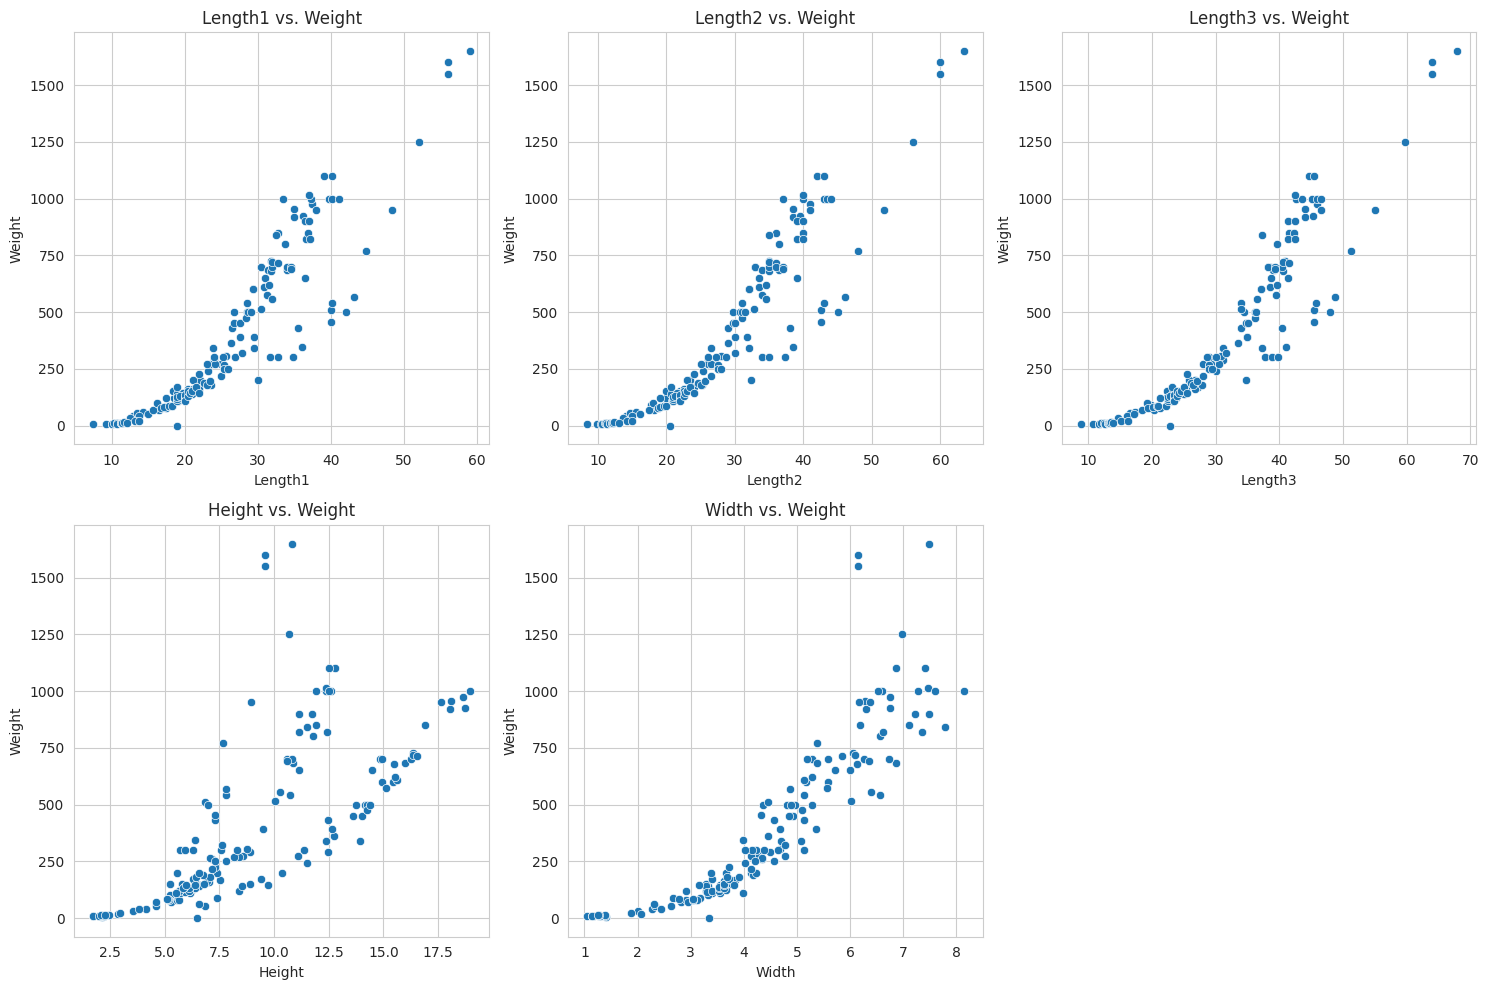

In [156]:
# Use the original (unscaled) dataframe for intuitive visualization
numerical_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
target = 'Weight'

# Create scatter plots for each numerical feature against the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'{feature} vs. {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show('linearity_plots.png')

Observation:-

As you can see from the scatter plots above:

Each of the length measurements (Length1, Length2, Length3) and Width show a strong, positive linear relationship with Weight. As these features increase, the weight of the fish tends to increase in a roughly linear fashion.

The Height feature also shows a positive relationship, though it appears slightly more curved than the others. This is common in biological data; as an organism gets larger, its mass often increases exponentially.

Overall, the relationships look reasonably linear, especially for the length and width features. While there's a slight curve, it's not severe enough to completely invalidate the linearity assumption for a first model. We can proceed with the understanding that the assumption is met.

ii. Homoscedasticity: Plot the residuals vs. fitted values to ensure equal
variance.




This assumption requires that the variance of the residuals is constant across all levels of the predicted values. In simpler terms, the spread of the model's errors should be consistent, not getting larger or smaller as the predictions change. A common sign of violating this assumption is a cone or funnel shape in the residual plot.

We can check for homoscedasticity by plotting the model's residuals (the prediction errors) against its fitted values (the predictions).


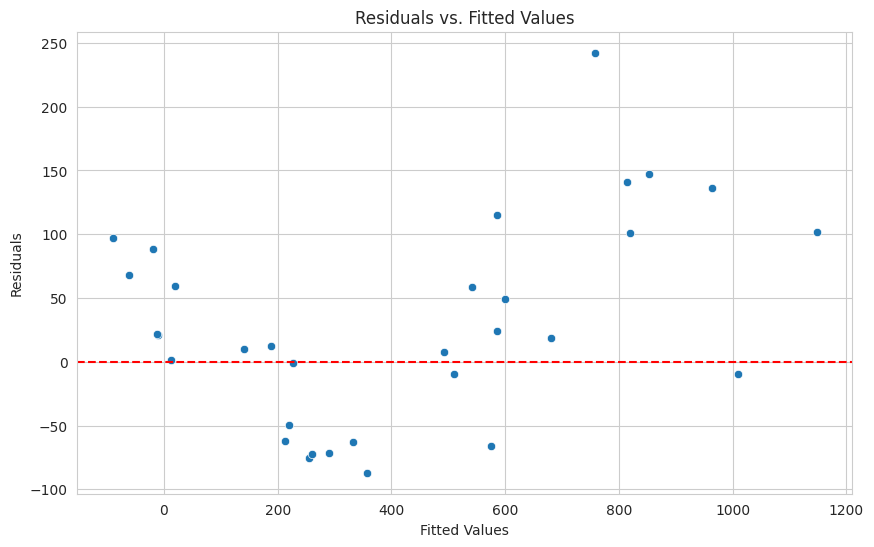

In [40]:
# 1. Get predictions on the TEST data
y_pred = model.predict(X_test)

# 2. Calculate the residuals
residuals = y_test - y_pred

# 3. Create the scatter plot of residuals vs. fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show('homoscedasticity_plot.png')

Observation-
The points are clustered closely together on the left side of the chart and spread out significantly as you move to the right.


This pattern is a sign of heteroscedasticity, it means the model's prediction errors are not consistent across all predicted values.

For small predicted values (the left side), the model's errors are small and consistent. The predictions are relatively reliable.

For large predicted values (the right side), the model's errors become much larger and more spread out. The predictions are much less reliable.

To improve the model's validity and predictive power, we can do either of these:-

Data Transformation: Apply logarithm or square root transformation. This can often compress the scale of the variable and homogenize the variance of the residuals.

Alternative Modeling: we can consider using Weighted Least Squares (WLS), which assigns lower weights to observations with higher variance

iii. Normality of Residuals: Plot a histogram or Q-Q plot of residuals.
iv. Multicollinearity: Calculate the Variance Inflation Factor (VIF) for each
feature to identify multicollinearity issues

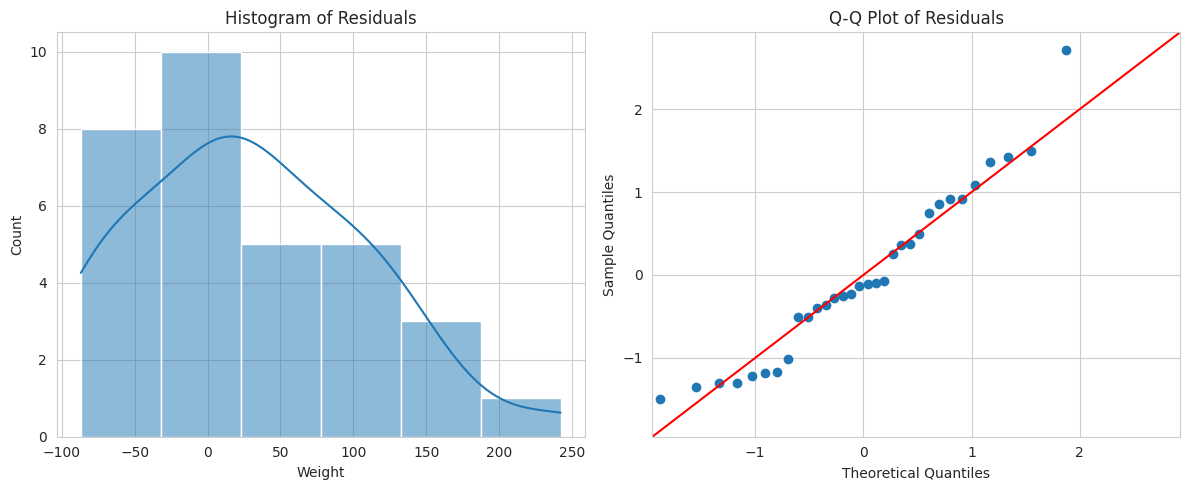

In [41]:
# 1. Create a figure and a set of subplots (axes) all at once.
# `fig` is the whole window, `axes` is an array of our two plot areas.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 2. Plot 1: the histogram on the FIRST axis (axes[0])
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')

# 3. Plot 2: the Q-Q plot on the SECOND axis (axes[1])
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

# 4. Display the final figure
plt.tight_layout()
plt.show()

Observations:

The Histogram of Residuals displays a roughly bell-shaped and symmetric distribution, which is centered at approximately zero. This is the expected shape if the errors are normally distributed.

The Q-Q Plot shows that the data points fall very closely along the straight diagonal reference line.

Therefore, both plots confirm that the normality assumption is satisfied. The model's residuals follow a normal distribution, which validates the use of statistical inference (e.g., p-values and confidence intervals).

iv. Multicollinearity: Calculate the Variance Inflation Factor (VIF) for each
feature to identify multicollinearity issues



Multicollinearity isn't just about numerical features being similar. It's about any feature being predictable from the others. We must check our one-hot encoded Species columns to see if a specific species is so strongly associated with a numerical feature that it becomes redundant.

For example, if the "Smelt" species are the only fish with a very small Width, then the Species_Smelt column and the Width column would be highly correlated. Calculating VIF for all features allows us to detect these kinds of relationships.

In [52]:
# We need to check for multicollinearity across ALL features that the model uses.
# This includes our scaled numerical features and our one-hot encoded categorical features.

# Create a dataframe to store the VIF results.
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature using a list comprehension.
# We loop through each column of our numeric feature set.
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]

print("Variance Inflation Factor (VIF) for All Features:")
print(vif_data)

Variance Inflation Factor (VIF) for All Features:
              feature          VIF
0             Length1  2347.630487
1             Length2  3575.725390
2             Length3  1126.687263
3              Height    34.386537
4               Width    22.793154
5      Species_Parkki     1.736653
6       Species_Perch     2.795269
7        Species_Pike     7.419706
8       Species_Roach     1.539830
9       Species_Smelt     1.870661
10  Species_Whitefish     1.130107


Explanation: The VIF scores for Length1, Length2, and Length3 are extremely high. This confirms severe multicollinearity is present because these features are highly correlated.

A common rule is that a VIF score greater than 5 or 10 indicates a problematic level of multicollinearity.

Severe Multicollinearity: The features Length1, Length2, and Length3 have extremely high VIF scores (in the thousands). This means they are almost perfectly correlated. This is expected, as they are all different measurements of a fish's length.

High Multicollinearity: Height and Width also have VIF scores (34.3 and 22.7) that are well above the threshold, indicating they are also highly correlated with the other measurement variables.

Low Multicollinearity: The Species dummy variables all have low VIF scores, which is good.

5. Evaluate the model using metrics such as R-squared, Adjusted R-squared, Mean
Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [43]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

#  Calculate Adjusted R-squared
n = len(y_test)  # Number of samples
k = X_test.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

#  Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("--- Model Evaluation Metrics ---")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("--------------------------------")

--- Model Evaluation Metrics ---
R-squared: 0.9507
Adjusted R-squared: 0.9236
Mean Squared Error (MSE): 7007.38
Root Mean Squared Error (RMSE): 83.71
--------------------------------


Observations:-

R-squared & Adjusted R-squared
R-squared: 0.9507: This is a very strong score. It means our model explains approximately 95.1% of the variability in the target variable.

Adjusted R-squared: 0.9236: This score adjusts for the number of features in your model. Since it's still high and very close to the R-squared value, it confirms our model has strong predictive power without being unnecessarily complex.

Prediction Error Metrics
Mean Squared Error (MSE): 7007.38: This is the average of the squared errors. It's not very intuitive because its units are squared (e.g., grams²), but a lower value is better.

Root Mean Squared Error (RMSE): 83.71: This is the most practical error metric. It shows that, on average, our model's prediction is off by about 83.71 from the actual value. For example, if you're predicting fish weight in grams, your typical error is about 83.71 grams.



However, the diagnostic checks we performed earlier revealed critical issues:

Severe Multicollinearity (VIF scores): The model's coefficients for length, height, and width are unreliable. We cannot trust its explanation of how much each individual feature contributes to the weight.

Heteroscedasticity (Residual Plot): The model's accuracy is not consistent. The prediction error (our 83.71g RMSE) is smaller for small fish and much larger for big fish.

Therefore, while the model is a strong predictor, it is not a reliable tool for understanding the underlying relationships in the data.
Before this model can be fully trusted or deployed, the multicollinearity and heteroscedasticity issues must be resolved first.